In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  

In [9]:
train_df =pd.read_csv('F:/train.csv' )

In [10]:
test_df = pd.read_csv('F:/test.csv')

In [11]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(-10.0, 90.0)

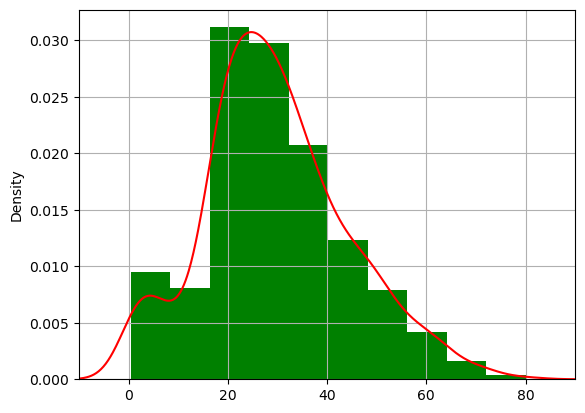

In [15]:
train_df['Age'].plot( kind = 'density',color = 'red')
axes = train_df['Age'].hist(bins=10,density =True,stacked = True ,color = 'green')
plt.xlim(-10,90)

<Axes: xlabel='Embarked', ylabel='count'>

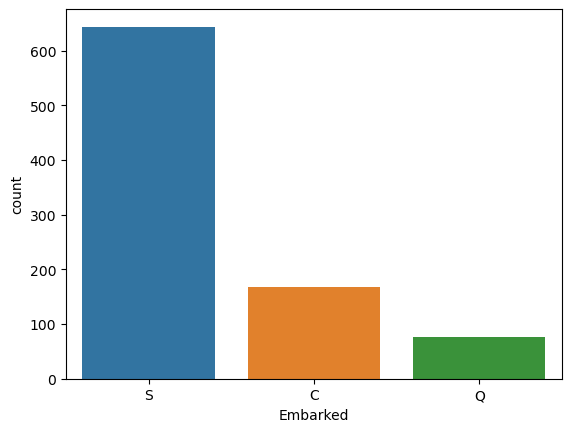

In [16]:
sns.countplot(x='Embarked',data = train_df)

In [17]:
train_df['Age'].median(skipna=True)
train_df['Embarked'].value_counts().idxmax()



'S'

In [18]:
train_data = train_df.copy()

train_data['Age'].fillna(train_data['Age'].median(skipna=True),inplace = True)
train_data.drop('Cabin',axis =1,inplace =True)
train_data['Embarked'].fillna(train_data['Embarked'].value_counts().idxmax(),inplace=True)




In [19]:
train_data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

(-10.0, 90.0)

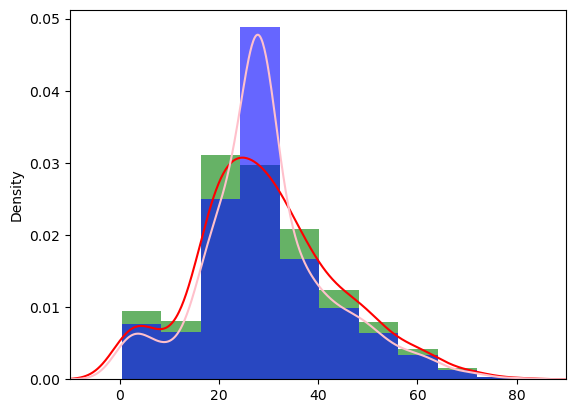

In [20]:

axes = train_df['Age'].hist(bins=10,density =True,stacked = True ,color = 'green',alpha = 0.6)
axes=train_df['Age'].plot( kind = 'density',color = 'red')

axes = train_data['Age'].hist(bins=10,density =True,stacked = True ,color = 'blue',alpha = 0.6)
axes=train_data['Age'].plot( kind = 'density',color = 'pink')
plt.xlim(-10,90)



In [21]:
train_data['Travel_Alone']=np.where((train_data['SibSp']+train_data['Parch'])>0,0,1)

In [22]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Travel_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [23]:
train_data.drop(['SibSp','Parch'],axis = 1,inplace = True)

In [24]:
train_data.drop(['PassengerId','Name','Ticket'],axis = 1,inplace = True)

In [25]:
train_data

,Survived,Pclass,Sex,Age,Fare,Embarked,Travel_Alone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,1
887,1,1,female,19.0,30.0000,S,1
888,0,3,female,28.0,23.4500,S,0
889,1,1,male,26.0,30.0000,C,1


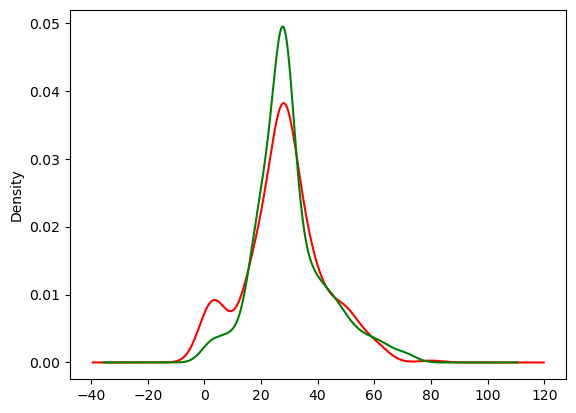

In [26]:
axes=train_data['Age'][train_data.Survived==1].plot( kind = 'density',color = 'red')
axes=train_data['Age'][train_data.Survived==0].plot( kind = 'density',color = 'green')

C:\Users\mousa\AppData\Local\Temp\ipykernel_7384\1772388814.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  axes = sns.kdeplot(train_data['Age'][train_data.Survived==1], color = 'black',shade = True)
C:\Users\mousa\AppData\Local\Temp\ipykernel_7384\1772388814.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  axes = sns.kdeplot(train_data['Age'][train_data.Survived==0], color = 'yellow',shade = True)


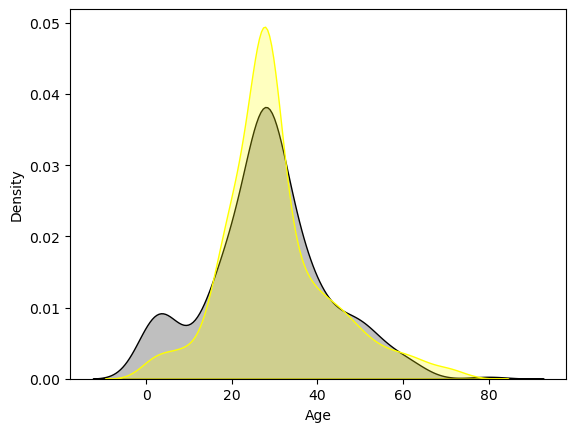

In [27]:
axes = sns.kdeplot(train_data['Age'][train_data.Survived==1], color = 'black',shade = True)
axes = sns.kdeplot(train_data['Age'][train_data.Survived==0], color = 'yellow',shade = True)

In [28]:
train_data = pd.get_dummies(train_data,columns=['Embarked','Sex'])

In [29]:
train_data

,Survived,Pclass,Age,Fare,Travel_Alone,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,7.2500,0,False,False,True,False,True
1,1,1,38.0,71.2833,0,True,False,False,True,False
2,1,3,26.0,7.9250,1,False,False,True,True,False
3,1,1,35.0,53.1000,0,False,False,True,True,False
4,0,3,35.0,8.0500,1,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,False,False,True,False,True
887,1,1,19.0,30.0000,1,False,False,True,True,False
888,0,3,28.0,23.4500,0,False,False,True,True,False
889,1,1,26.0,30.0000,1,True,False,False,False,True


In [41]:
train_data['Sex_female']=np.where(['Sex_female']==True ,1,0)
train_data['Embarked_C']=np.where(['Embarked_C']==True ,1,0)
train_data['Embarked_Q']=np.where(['Embarked_Q']==True ,1,0)
train_data['Embarked_S']=np.where(['Embarked_S']==True ,1,0)
train_data['Sex_male']=np.where(['Sex_male']==True ,1 ,0)



In [43]:
train_data

,Survived,Pclass,Age,Fare,Travel_Alone,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,7.2500,0,0,0,0,0,0
1,1,1,38.0,71.2833,0,0,0,0,0,0
2,1,3,26.0,7.9250,1,0,0,0,0,0
3,1,1,35.0,53.1000,0,0,0,0,0,0
4,0,3,35.0,8.0500,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,0,0,0,0,0
887,1,1,19.0,30.0000,1,0,0,0,0,0
888,0,3,28.0,23.4500,0,0,0,0,0,0
889,1,1,26.0,30.0000,1,0,0,0,0,0


C:\Users\mousa\AppData\Local\Temp\ipykernel_7384\2652206496.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  axes = sns.kdeplot(train_data['Fare'][train_data.Survived==1], color = 'black',shade = True)
C:\Users\mousa\AppData\Local\Temp\ipykernel_7384\2652206496.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  axes = sns.kdeplot(train_data['Fare'][train_data.Survived==0], color = 'yellow',shade = True)


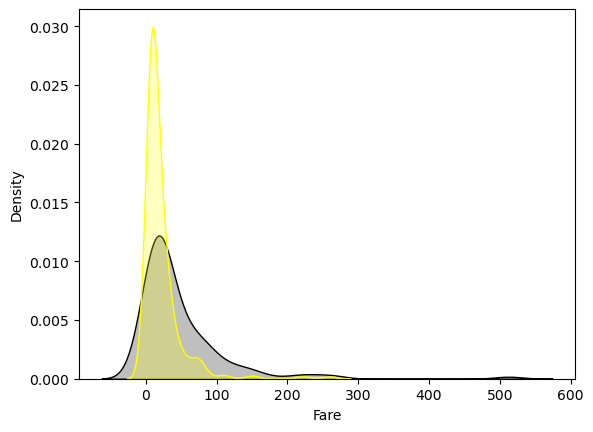

In [31]:
axes = sns.kdeplot(train_data['Fare'][train_data.Survived==1], color = 'black',shade = True)
axes = sns.kdeplot(train_data['Fare'][train_data.Survived==0], color = 'yellow',shade = True)

<Axes: xlabel='Pclass', ylabel='Survived'>

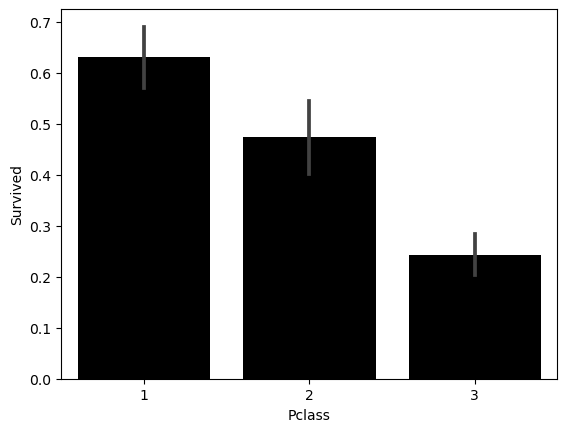

In [32]:
sns.barplot(x='Pclass',y ='Survived',data=train_data,color='black')

In [33]:
sns.barplot(x='Embarked',y ='Survived',data=train_data,color='black')

ValueError: Could not interpret input 'Embarked'

In [34]:
sns.barplot(x='Sex',y ='Survived',data=train_data,color='black')

ValueError: Could not interpret input 'Sex'

<Axes: xlabel='Travel_Alone', ylabel='Survived'>

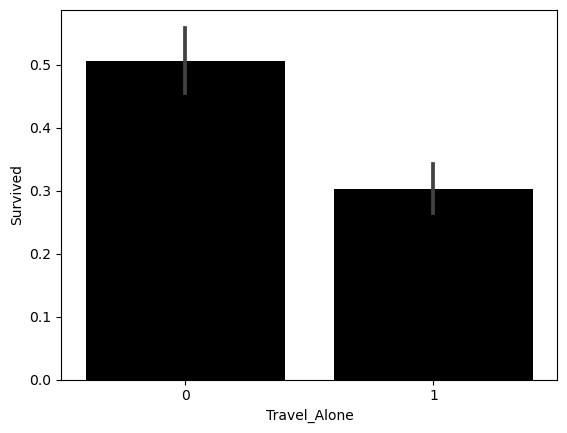

In [35]:
sns.barplot(x='Travel_Alone',y ='Survived',data=train_data,color='black')

<Axes: >

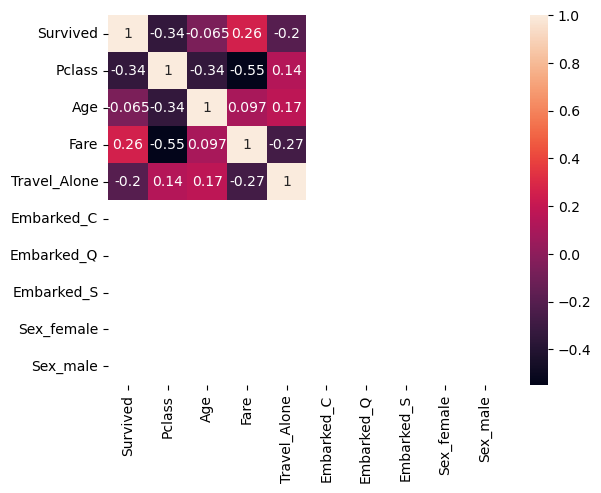

In [36]:
sns.heatmap(train_data.corr(),annot = True)

In [37]:
train_data


,Survived,Pclass,Age,Fare,Travel_Alone,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,7.2500,0,0,0,0,0,0
1,1,1,38.0,71.2833,0,0,0,0,0,0
2,1,3,26.0,7.9250,1,0,0,0,0,0
3,1,1,35.0,53.1000,0,0,0,0,0,0
4,0,3,35.0,8.0500,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,0,0,0,0,0
887,1,1,19.0,30.0000,1,0,0,0,0,0
888,0,3,28.0,23.4500,0,0,0,0,0,0
889,1,1,26.0,30.0000,1,0,0,0,0,0


In [38]:
train_X

NameError: name 'train_X' is not defined